Hello and welcome to my updated and refreshed coffee project. Several years ago as I was starting my Master's Degree, one of my first projects was a process improvement project. I looked to my personal life for a process that could be used. After a bit of thought, I settled on coffee. My coffee was inconsistent and I was occassionally picking it up on the way to work. Buying coffee every morning was expensive but my own coffee had no process. So I tracked it for about a month and realized how all over the place I was. I viewed a handful of tutorials online and set about making delicious coffee, consistently. 

Shortly after the class ended, I maintained the process but did not keep the data. Realizing again that this would be a unique project that could be ongoing and help grow my Python skills.

There are a couple of notes that I want to add here. I did not have an effective way to measure water temperature so I left that out. As I will mention later, quality of water is also excluded though it is considered quite important. This is because I always used the same source of water so it was kept as consistent as possible. Finally a note on the rating. This was purely subjective to my taste. Because the rating is to my taste, it will be inconsistent and not make great machine learning models when they are completed. That was the point, this was my own data that I captured and I hoped to make it at least sort of resemble some of the data I might see in the real world.

This side of the code is for exploring the data and a testing space. As the project is ongoing, the code in here will change as I interact with this data almost every day. I begin by importing the libraries that are needed.

In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

I then read in the csv where my data is kept. I maintain a separate script where I enter and append the data into the csv then resave the csv for manipulation here.

In [2]:
df = pd.read_csv('coffee.csv', index_col = 0)
df.head()

,Date,Brand,Roast,Blend,Iced,Grind_size,Method,Amount_coffee,Amount_water,Amount_ice,Bloom_time,Rating
0,03/29/2022,deathwish,medium,run the day,yes,8,chemex,42,503,242.0,45,7.0
1,03/31/2022,Deathwish,Medium,Run the Day,No,9,Chemex,33,507,NaN,45,6.5
2,04/06/22,Deathwish,Medium,Run the Day,No,9,Chemex,31,506,NaN,45,7.0
3,04/08/2022,Deathwish,Medium,Run the Day,Yes,10,Chemex,50,630,222.0,45,7.5
4,04/09/2022,Deathwish,Medium,Run the Day,Yes,10,Chemex,51,602,202.0,45,7.5


Afer the csv has been read in, I execute a couple of personal perferences that make working with the data a little bit easier. First I change all the columns names to lowercase. Though I was the one who originally created the column names, I feel like this is good practice as a way to standarize the data and get into a habit of how to approach any data I come across or would use for.
I change the values within the data to lowercase as well for similar reasons. As I know I will be making visualizations of this data a little bit further down, putting all of the data into lowercase helps reduce the duplication that may occur and reduces the amount of time I may need to go to the top of my code to edit things already run.

In [3]:
# Time to clean the data
df.columns = df.columns.str.lower()
df.head()

,date,brand,roast,blend,iced,grind_size,method,amount_coffee,amount_water,amount_ice,bloom_time,rating
0,03/29/2022,deathwish,medium,run the day,yes,8,chemex,42,503,242.0,45,7.0
1,03/31/2022,Deathwish,Medium,Run the Day,No,9,Chemex,33,507,NaN,45,6.5
2,04/06/22,Deathwish,Medium,Run the Day,No,9,Chemex,31,506,NaN,45,7.0
3,04/08/2022,Deathwish,Medium,Run the Day,Yes,10,Chemex,50,630,222.0,45,7.5
4,04/09/2022,Deathwish,Medium,Run the Day,Yes,10,Chemex,51,602,202.0,45,7.5


In [4]:
df['brand'] = df['brand'].str.lower()
df.head()

,date,brand,roast,blend,iced,grind_size,method,amount_coffee,amount_water,amount_ice,bloom_time,rating
0,03/29/2022,deathwish,medium,run the day,yes,8,chemex,42,503,242.0,45,7.0
1,03/31/2022,deathwish,Medium,Run the Day,No,9,Chemex,33,507,NaN,45,6.5
2,04/06/22,deathwish,Medium,Run the Day,No,9,Chemex,31,506,NaN,45,7.0
3,04/08/2022,deathwish,Medium,Run the Day,Yes,10,Chemex,50,630,222.0,45,7.5
4,04/09/2022,deathwish,Medium,Run the Day,Yes,10,Chemex,51,602,202.0,45,7.5


In [5]:
df['date'] = pd.to_datetime(df['date'])
df['roast'] = df['roast'].str.lower()
df['blend'] = df['blend'].str.lower()
df['method'] = df['method'].str.lower()
df['iced'] = df['iced'].str.lower()
df.head()

,date,brand,roast,blend,iced,grind_size,method,amount_coffee,amount_water,amount_ice,bloom_time,rating
0,2022-03-29,deathwish,medium,run the day,yes,8,chemex,42,503,242.0,45,7.0
1,2022-03-31,deathwish,medium,run the day,no,9,chemex,33,507,NaN,45,6.5
2,2022-04-06,deathwish,medium,run the day,no,9,chemex,31,506,NaN,45,7.0
3,2022-04-08,deathwish,medium,run the day,yes,10,chemex,50,630,222.0,45,7.5
4,2022-04-09,deathwish,medium,run the day,yes,10,chemex,51,602,202.0,45,7.5


Once I am happy with how the dataframes looks, I look at the types of data within my column as well as take the opportunity to look at nulls. As I entered the data and familiar with it, I know that there should not be any nulls outside of the amount of ice column.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189 entries, 0 to 188
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           189 non-null    datetime64[ns]
 1   brand          189 non-null    object        
 2   roast          189 non-null    object        
 3   blend          189 non-null    object        
 4   iced           188 non-null    object        
 5   grind_size     189 non-null    int64         
 6   method         189 non-null    object        
 7   amount_coffee  189 non-null    int64         
 8   amount_water   189 non-null    int64         
 9   amount_ice     43 non-null     object        
 10  bloom_time     189 non-null    int64         
 11  rating         189 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 19.2+ KB


As I was entering the data one line at a time, I had hoped to reduce or even eliminate any errors. But even being careful, I occassionally mistyped and instead of fixing at the data entry step, I decided it was a better use of my skills to fix during the exploratory steps.

In [40]:
for i in df['method'].unique():
    print(i)

chemex
aeropress
french press


In [8]:
df.method = np.where(df.method == 'aeropress (swirl)', 'aeropress', df.method)
df.method = np.where(df.method == 'aeropres', 'aeropress', df.method)
df.iat[7, 6] = 'aeropress'
df.iat[13, 6] = 'chemex'
df.roast = np.where(df.roast == 'unknonw', 'unknown', df.roast)
df

,date,brand,roast,blend,iced,grind_size,method,amount_coffee,amount_water,amount_ice,bloom_time,rating
0,2022-03-29,deathwish,medium,run the day,yes,8,chemex,42,503,242.0,45,7.00
1,2022-03-31,deathwish,medium,run the day,no,9,chemex,33,507,NaN,45,6.50
2,2022-04-06,deathwish,medium,run the day,no,9,chemex,31,506,NaN,45,7.00
3,2022-04-08,deathwish,medium,run the day,yes,10,chemex,50,630,222.0,45,7.50
4,2022-04-09,deathwish,medium,run the day,yes,10,chemex,51,602,202.0,45,7.50
...,...,...,...,...,...,...,...,...,...,...,...,...
184,2022-12-14,bason,unknown,mistletoe java,no,11,chemex,35,550,NaN,45,8.25
185,2022-12-15,bason,unknown,mistletoe java,no,11,chemex,35,552,NaN,45,8.00
186,2022-12-16,bason,unknown,mistletoe java,no,11,chemex,35,555,NaN,45,8.25
187,2022-12-19,bason,unknown,mistletoe java,no,11,chemex,35,556,NaN,45,8.00


I mentioned before that because this data was being entered one line at a time, some times only one day at a time, I could look and capture errors as they appeared. If this data had been given to me with thousands or millions of rows, looking for individual errors would not be an effective use of time. As I saw below, there was a better way of capturing errors within the data.

In [ ]:
for i in df['blend'].unique():
    print(i)

In [10]:
df.blend = np.where(df.blend == '4&20 french roost', '4&20 french roast', df.blend)
df.blend = np.where(df.blend == 'ethiopian yirgacheffe\t', 'ethiopian yirgacheffe', df.blend)
df.blend = np.where(df.blend == 'sea salt caramel', 'sea salt caramel mocha', df.blend)
df.method = np.where(df.method == 'cheme', 'chemex', df.method)
df.roast = np.where(df.roast == 'meidum', 'medium', df.roast)
df.blend = np.where(df.blend == 'ruff weathre', 'ruff weather', df.blend)
df.blend = np.where(df.blend == 'el salvador pacamara / nicaragua maragogype\t', 
                    'el salvador pacamara / nicaragua maragogype', df.blend)
df.roast = np.where(df.roast == 'dark / medium', 'medium / dark', df.roast)

In [9]:
df.tail(15)

,date,brand,roast,blend,iced,grind_size,method,amount_coffee,amount_water,amount_ice,bloom_time,rating
174,2022-12-05,bason,dark,mexican dark,no,6,aeropress,22,242,NaN,0,8.00
175,2022-12-06,bason,medium / dark,santa's wintertime blend,no,11,chemex,35,553,NaN,45,8.25
176,2022-12-06,bason,dark,mexican dark,no,6,aeropress,22,247,NaN,0,8.00
177,2022-12-07,bason,dark / medium,santa's wintertime blend,no,11,chemex,35,556,NaN,45,8.25
178,2022-12-07,bason,dark,mexican dark,no,6,aeropress,22,242,NaN,0,8.25
179,2022-12-08,bason,medium / dark,santa's wintertime blend,no,11,chemex,35,556,NaN,45,8.25
180,2022-12-09,bason,dark,mexican dark,no,6,aeropress,22,245,NaN,0,8.00
181,2022-12-09,bason,dark,mexican dark,no,11,french press,35,553,NaN,0,8.25
182,2022-12-11,bason,unknown,jingle bell java,no,11,chemex,35,553,NaN,45,8.75
183,2022-12-14,bason,unknown,mistletoe java,no,6,aeropress,22,250,NaN,0,8.50


Now that initial issues with the data have been remedied, I can add a very important columns that is essential in making good coffee. The ratio.

This is an important value that is calculated from the amount of water used divided by the amount of coffee grounds used. Ratios are one of the most important pieces that can be controlled by the person making the coffee. Ratio of water to coffee, grind size, quality of beans, water temperature, and quality of water are considered the most important factors when making a cup of coffee.

In [11]:
ratio = df.amount_water / df.amount_coffee
df['ratio'] = ratio
df.head()

,date,brand,roast,blend,iced,grind_size,method,amount_coffee,amount_water,amount_ice,bloom_time,rating,ratio
0,2022-03-29,deathwish,medium,run the day,yes,8,chemex,42,503,242.0,45,7.0,11.976190
1,2022-03-31,deathwish,medium,run the day,no,9,chemex,33,507,NaN,45,6.5,15.363636
2,2022-04-06,deathwish,medium,run the day,no,9,chemex,31,506,NaN,45,7.0,16.322581
3,2022-04-08,deathwish,medium,run the day,yes,10,chemex,50,630,222.0,45,7.5,12.600000
4,2022-04-09,deathwish,medium,run the day,yes,10,chemex,51,602,202.0,45,7.5,11.803922


In [12]:
sns.set_theme(style = 'darkgrid')

Time for some visualizations!

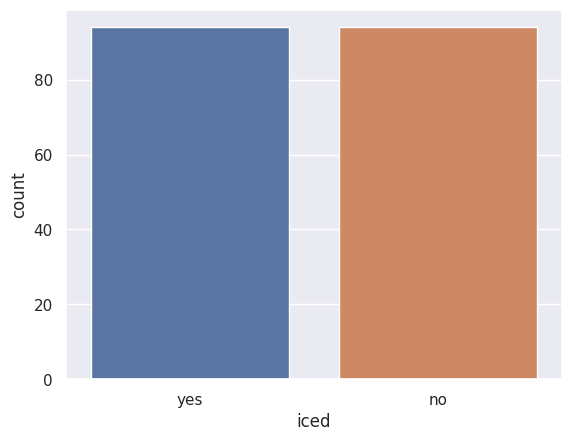

In [13]:
sns.countplot(data = df, x = 'iced')
plt.show()

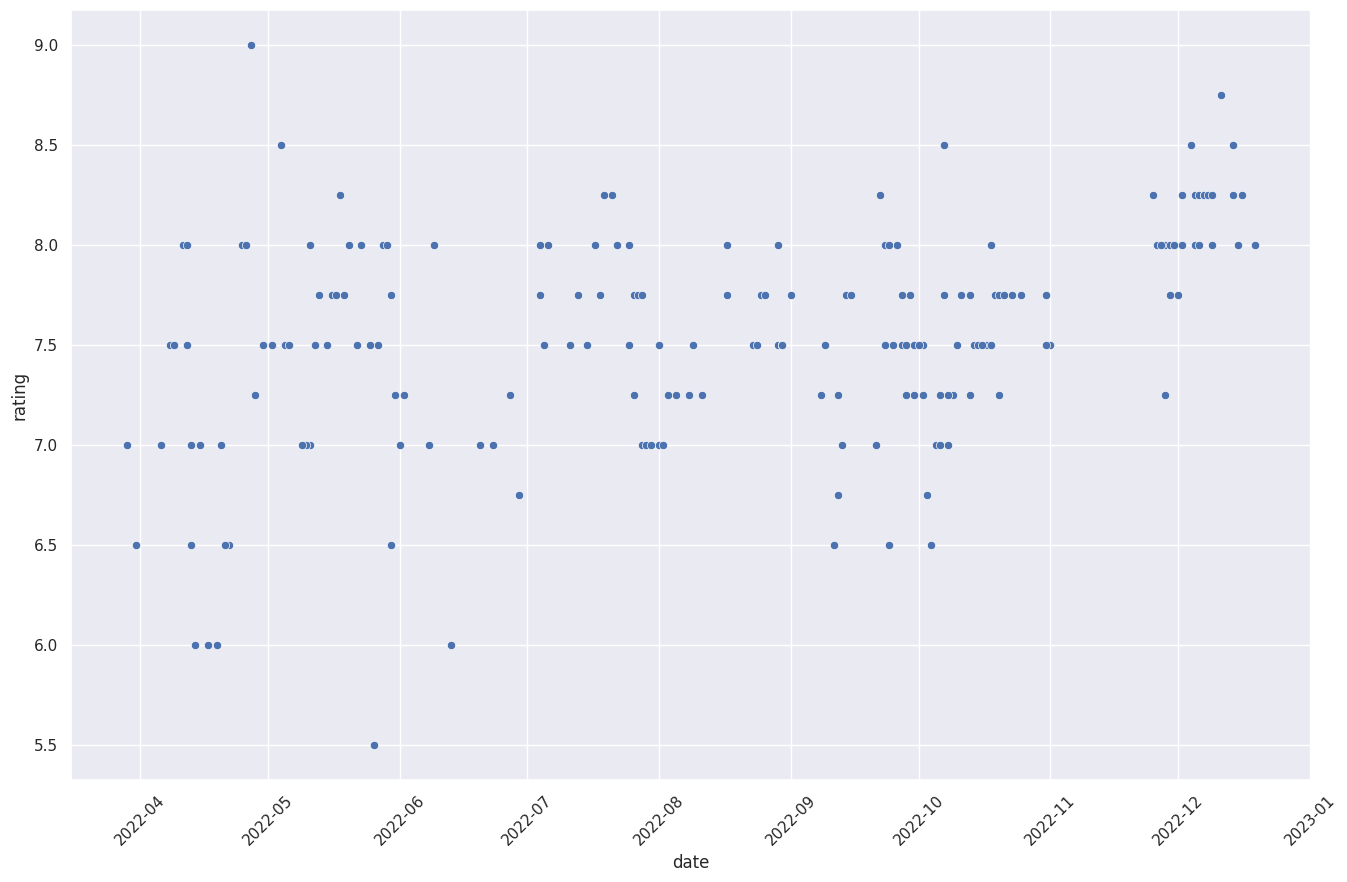

In [14]:
plt.figure(figsize = (16,10))
plt.xticks(rotation = 45)
sns.scatterplot(x='date', y = 'rating', data = df)
plt.show()

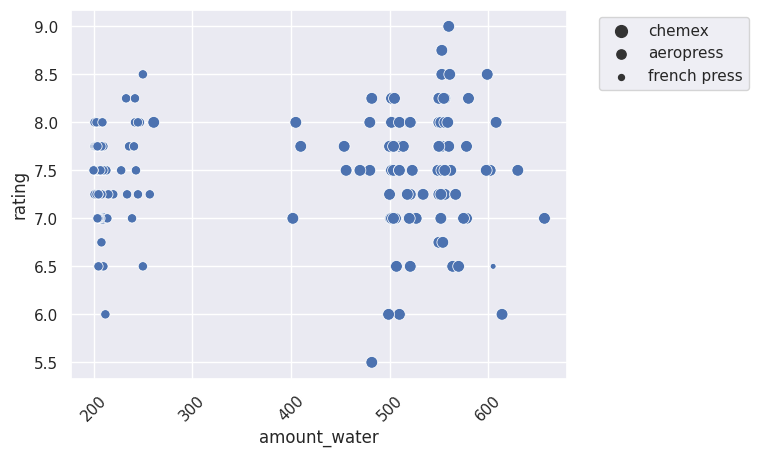

In [15]:
sns.scatterplot(x = 'amount_water', y = 'rating', size = 'method', data = df)
plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

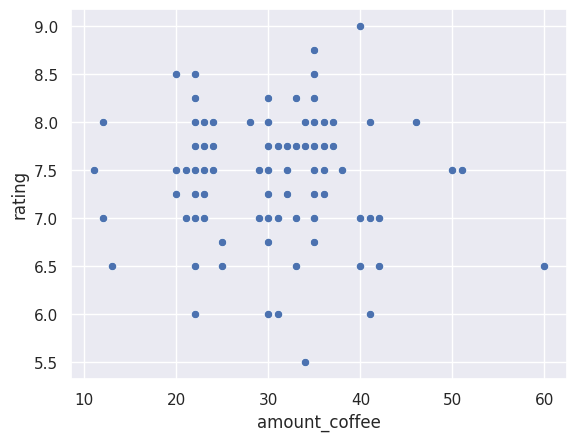

In [16]:
sns.scatterplot(x = 'amount_coffee', y = 'rating', data = df)
plt.show()

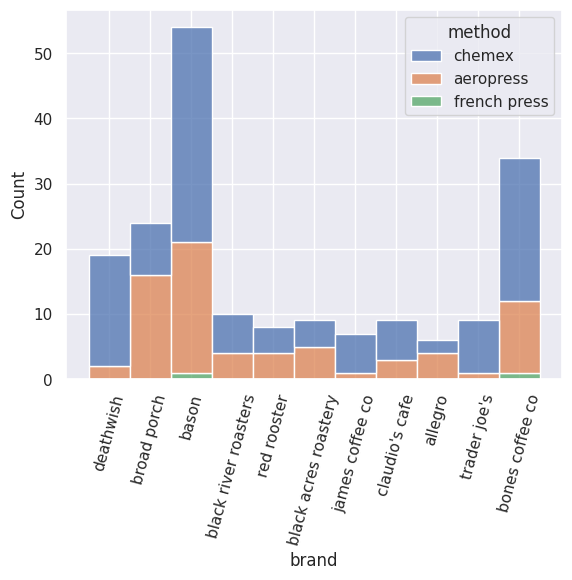

In [17]:
sns.histplot(x = 'brand', hue = 'method', multiple = 'stack', data = df)
plt.xticks(rotation = 75)
plt.show()

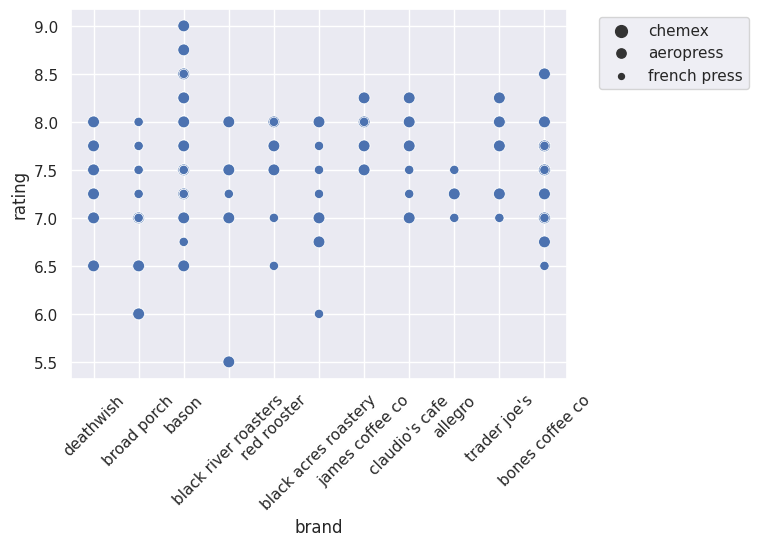

In [18]:
sns.scatterplot(x = 'brand', y = 'rating', size = 'method', data = df)
plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

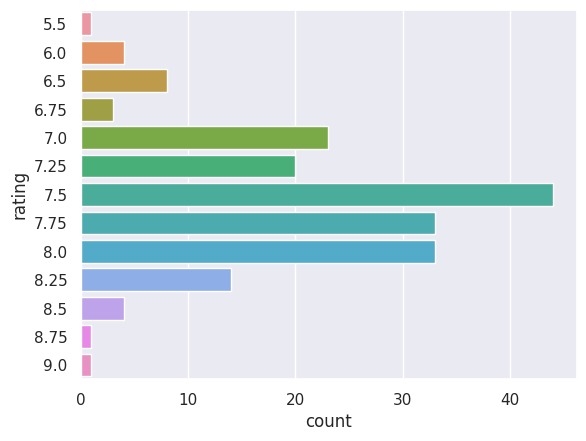

In [32]:
sns.countplot(data = df, y = 'rating')
plt.show()

Almost a normal distribution. It was not intentional but still kind of cool to see it happen.

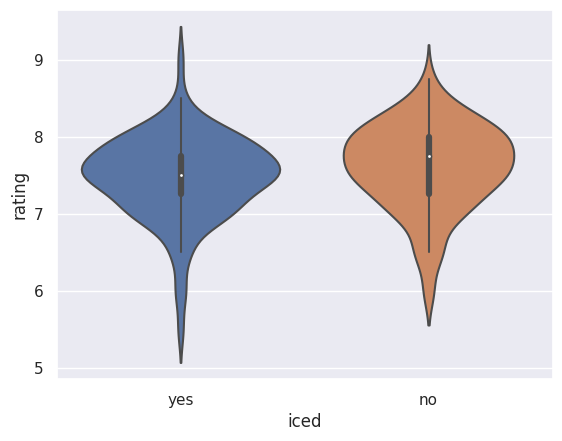

In [19]:
sns.violinplot(data = df, y = 'rating', x = 'iced')
plt.show()

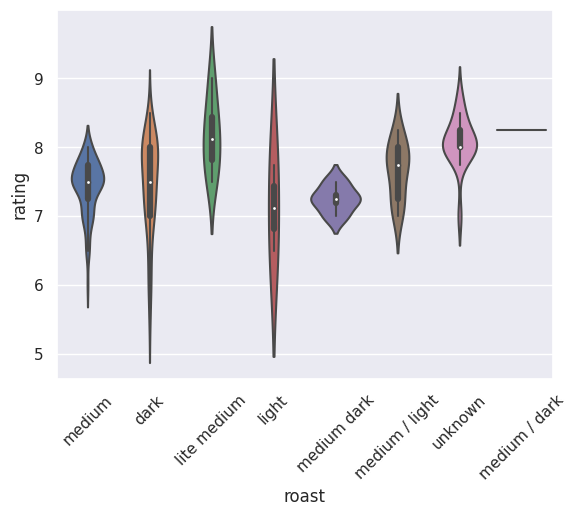

In [20]:
sns.violinplot(data = df, y = 'rating', x = 'roast')
plt.xticks(rotation = 45)
plt.show()

There are many different ways to call various roasts that are effectively the same. In the near future, I will be combining these into less categories. I think it will be a worthwhile task to change unknown to flavored coffee as the added flavor of the coffee may distract from my rating.

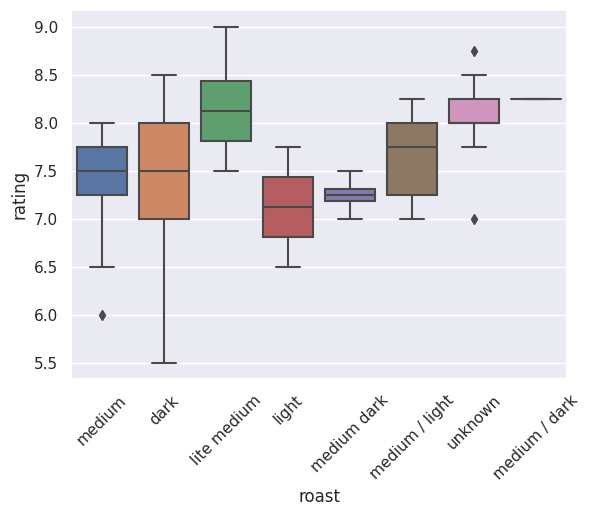

In [21]:
sns.boxplot(data = df, y = 'rating', x = 'roast')
plt.xticks(rotation = 45)
plt.show()

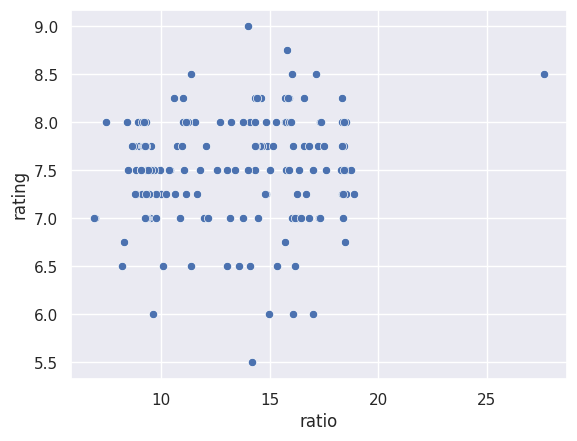

In [22]:
sns.scatterplot(data = df, y = 'rating', x = 'ratio')
plt.show()

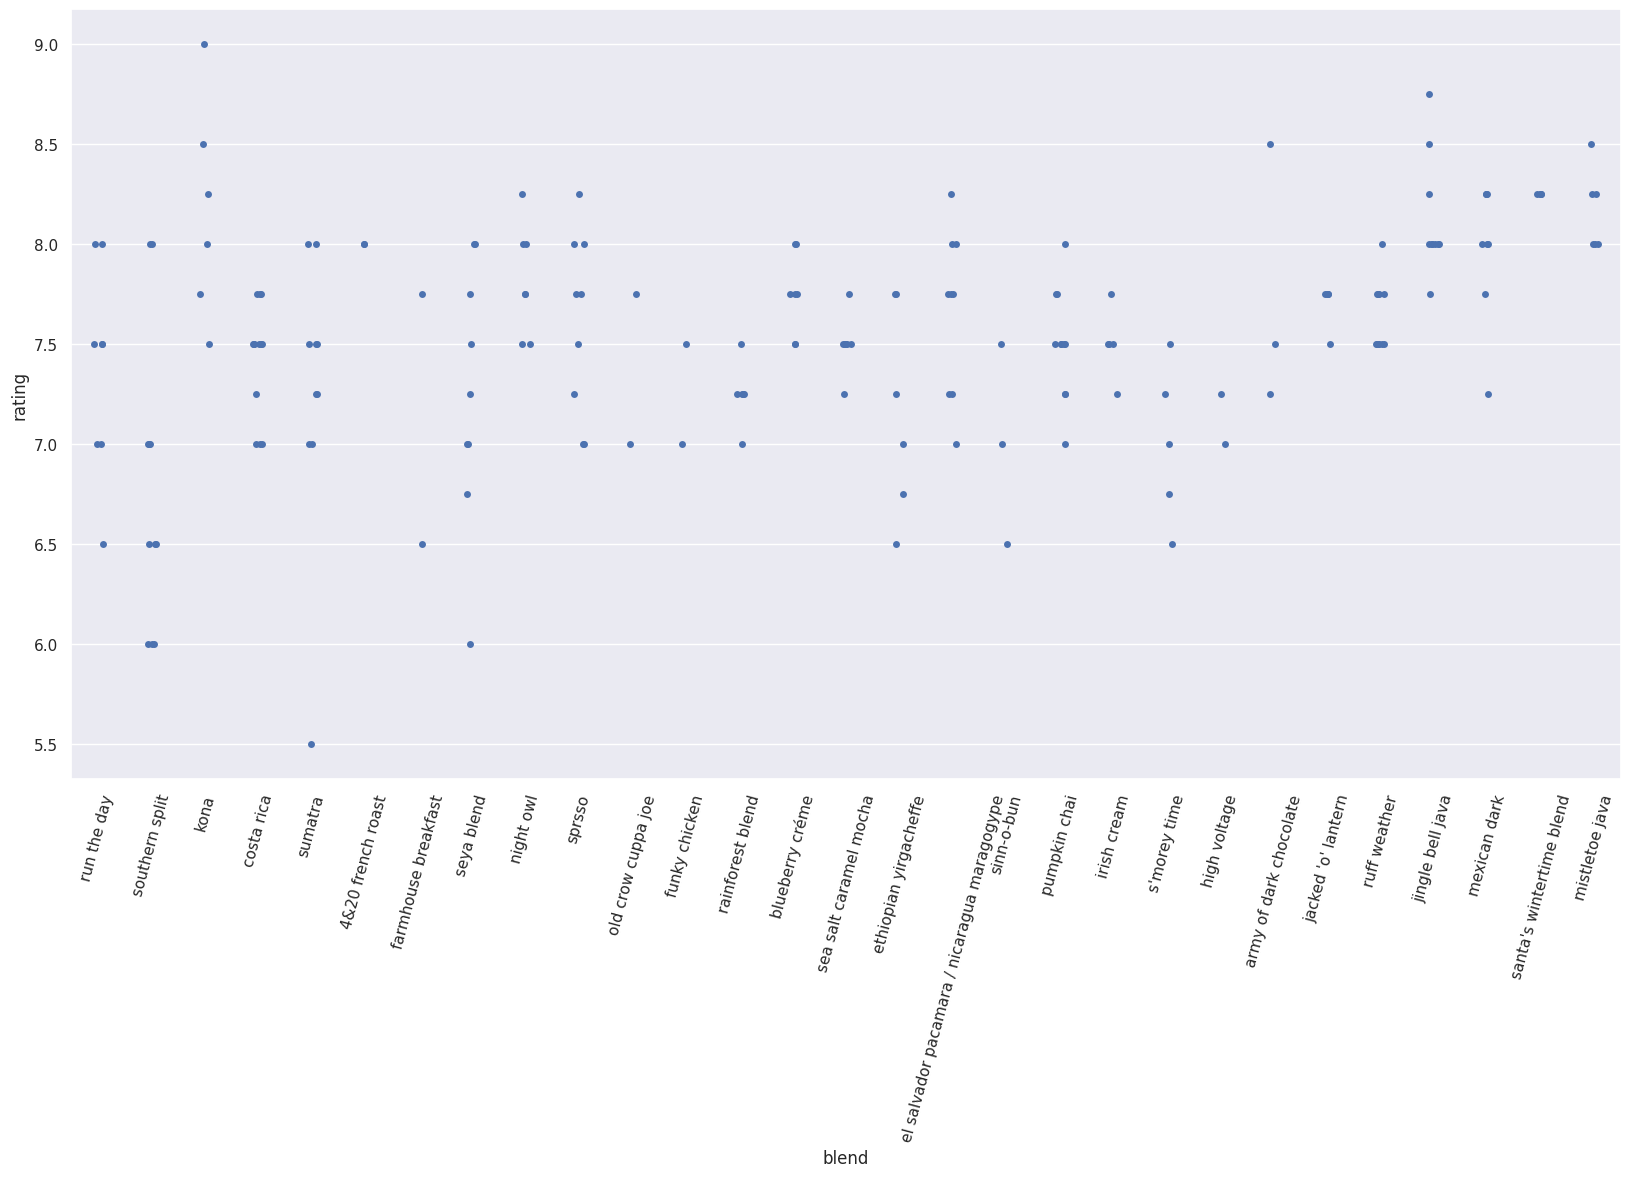

In [23]:
plt.figure(figsize = (20,10))
sns.stripplot(data = df, y = 'rating', x = 'blend')
plt.xticks(rotation = 75)
plt.show()

/tmp/ipykernel_8154/4189464842.py:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = df, y = 'rating', x = 'date', hue = 'roast')
/tmp/ipykernel_8154/4189464842.py:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = df, y = 'rating', x = 'date', hue = 'roast')


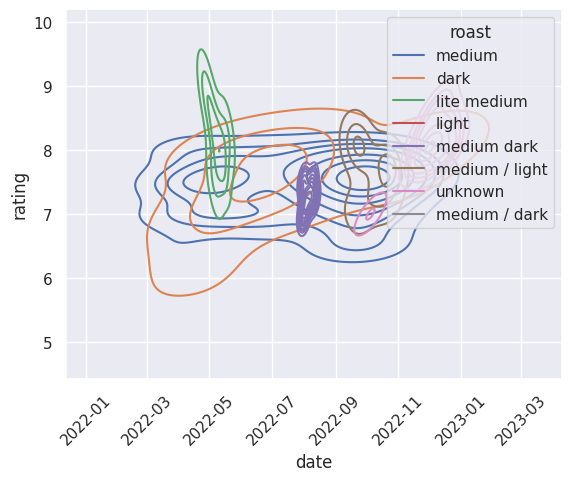

In [35]:
sns.kdeplot(data = df, y = 'rating', x = 'date', hue = 'roast')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation = 45)
plt.show()

Spliting the final dataframe into 3 separate ones based on the method of brewing. From here, I could make additional visualizations or begin training machine learning models to try and predict the rating based on the various factors.

In [25]:
df1, df2, df3 = [x for _, x in df.groupby(df['method'])]
# df1 is aeropress, df2 is chemex, df3 is french press

In [26]:
df2.tail()

,date,brand,roast,blend,iced,grind_size,method,amount_coffee,amount_water,amount_ice,bloom_time,rating,ratio
184,2022-12-14,bason,unknown,mistletoe java,no,11,chemex,35,550,NaN,45,8.25,15.714286
185,2022-12-15,bason,unknown,mistletoe java,no,11,chemex,35,552,NaN,45,8.00,15.771429
186,2022-12-16,bason,unknown,mistletoe java,no,11,chemex,35,555,NaN,45,8.25,15.857143
187,2022-12-19,bason,unknown,mistletoe java,no,11,chemex,35,556,NaN,45,8.00,15.885714
188,2022-12-19,bason,unknown,mistletoe java,no,11,chemex,35,559,NaN,45,8.00,15.971429


In [27]:
# df.loc[df['team'] == 'A', 'points'].mean()

for i in df['brand'].unique():
    print(i, df.loc[df['brand'] == i, 'rating'].mean())

deathwish 7.447368421052632
broad porch 7.125
bason 7.8842592592592595
black river roasters 7.25
red rooster 7.4375
black acres roastery 7.25
james coffee co 7.821428571428571
claudio's cafe 7.611111111111111
allegro 7.25
trader joe's 7.666666666666667
bones coffee co 7.455882352941177


In [28]:
df.brand.value_counts()[0:]

bason                   54
bones coffee co         34
broad porch             24
deathwish               19
black river roasters    10
black acres roastery     9
claudio's cafe           9
trader joe's             9
red rooster              8
james coffee co          7
allegro                  6
Name: brand, dtype: int64

In [29]:
#df_unique = df.brand.unique()
for i in df['brand'].unique():
    df_unique = (df.loc[df['brand'] == i, 'rating'].mean())

Getting the average rating from each brand as well as the number of times I have used a specific brand of coffee.

In [39]:
df_3 = df.groupby('brand').agg({'rating':['mean','count']})
df_3.columns = df_3.columns.droplevel()
df_3

,mean,count
brand,,
allegro,7.250000,6
bason,7.884259,54
black acres roastery,7.250000,9
black river roasters,7.250000,10
bones coffee co,7.455882,34
broad porch,7.125000,24
claudio's cafe,7.611111,9
deathwish,7.447368,19
james coffee co,7.821429,7


Bad pipe message: %s [b'\x82=\xa27\x1eYx\xab\x01\x04i`\x8e\x06\x1e<\xd0\xad \x15\x99\t\xa3\xb9\xef\xe9J\xd6\xe1f\x90\x905\xce\x16\xde\xb0\xdbx\xc9>\xc4\xdb\xe5\xb2\xdcC*\xa7\xd5\xaa\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00']
Bad pipe message: %s [b'\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05']
Bad pipe message: %s [b'\x03\x08']
Bad pipe message: %s [b'\x08\x08\t\x08\n\x08']
Bad pipe message: %s [b'\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06']
Bad pipe message: %s [b'']
Bad pipe message: %s [b"\x95\xad\xb6\x8b\xdc\x82\xf8%p\xe8\xec\xa7B\x1c\xe2\x9e\xa14\x00\x00\xa6\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0s\xc0w\x00\xc4\x00\xc3\xc0#\xc0'\x00g\x00@\xc0r\xc